In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv('/content/drive/MyDrive/Internship/Dataset .csv')

# **Task 1: Restaurant Reviews**

In [95]:
df.rename(columns={"Rating text":"Reviews"},inplace=True)

# Q1. Analyze the text reviews to identify the mostcommon positive and negative keywords.

In [96]:
df.Reviews.unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

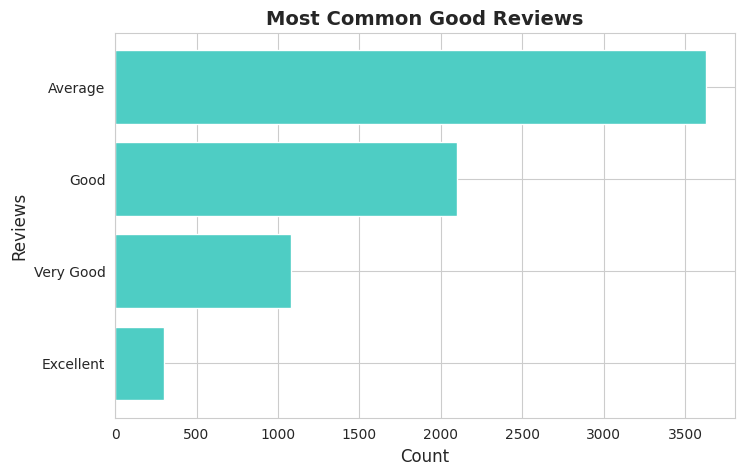

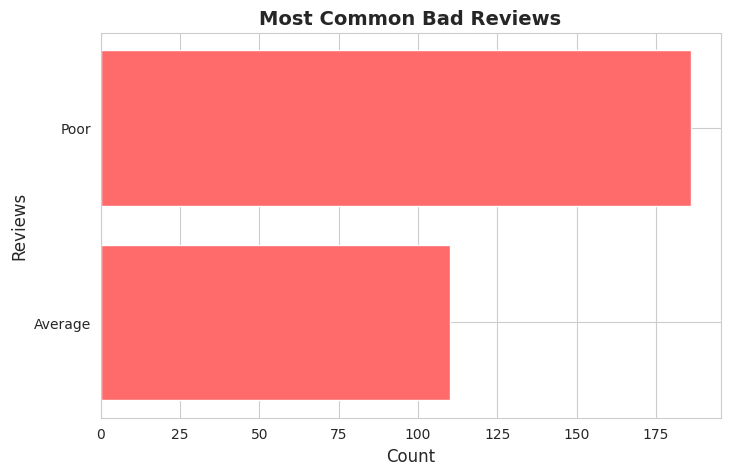

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Filter out empty reviews
df_filtered = df[df['Reviews'] != "Not rated"]

# Step 2: Filter Reviews Based on "Aggregate rating"
bad_reviews = df_filtered[df_filtered['Aggregate rating'] <= 2.5]['Reviews']
good_reviews = df_filtered[df_filtered['Aggregate rating'] >= 2.6]['Reviews']

# Step 3: Count the Frequency of Reviews
bad_counts = Counter(bad_reviews)
good_counts = Counter(good_reviews)

# Step 4: Convert to DataFrames for Plotting
bad_df = pd.DataFrame(bad_counts.items(), columns=['Review', 'Count']).sort_values(by='Count', ascending=False).head(10)
good_df = pd.DataFrame(good_counts.items(), columns=['Review', 'Count']).sort_values(by='Count', ascending=False).head(10)

# Step 5: Plot Bar Charts
def plot_bar_chart(df, title, color):
    plt.figure(figsize=(8, 5))
    plt.barh(df['Review'], df['Count'], color=color)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Reviews", fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()  # Highest count on top
    plt.show()

# Generate Bar Charts
plot_bar_chart(good_df, "Most Common Good Reviews", color='#4ECDC4')  # Teal tone
plot_bar_chart(bad_df, "Most Common Bad Reviews", color='#FF6B6B')  # Red tone

# Q2. Calculate the average length of reviews andexplore if there is a relationship betweenreview length and rating.

📌 The average review length is 7.0 characters.




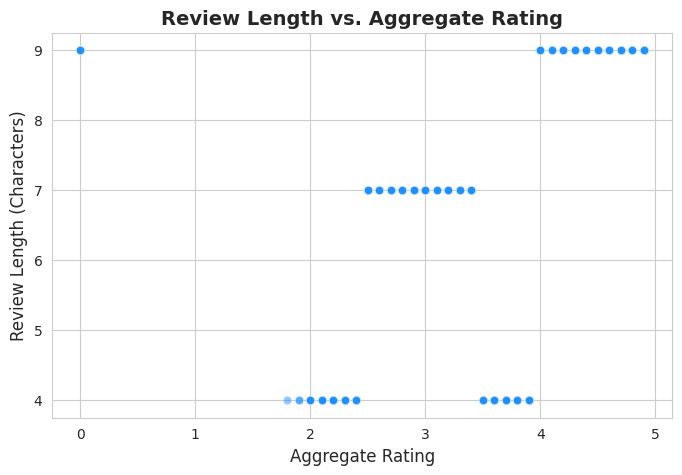

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Remove missing reviews
df_filtered = df[df['Reviews'].notna()].copy()

# Step 2: Calculate Review Length (Character Count)
df_filtered['Review_Length'] = df_filtered['Reviews'].apply(lambda x: len(x.strip()))

# Step 3: Calculate Average Review Length
average_review_length = round(df_filtered['Review_Length'].mean(), 2)
print(f"📌 The average review length is {average_review_length.round()} characters.")

print("\n")
# Step 4: Scatter Plot - Review Length vs. Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered['Aggregate rating'], y=df_filtered['Review_Length'], alpha=0.5, color='dodgerblue')

plt.xlabel("Aggregate Rating", fontsize=12)
plt.ylabel("Review Length (Characters)", fontsize=12)
plt.title("Review Length vs. Aggregate Rating", fontsize=14, fontweight='bold')

plt.show()

# **Task 2: Votes Analysis**

## Q1. Identify the restaurants with the highest andlowest number of votes.

In [112]:
# Aggregate votes by restaurant
restaurant_votes = df.groupby('Restaurant Name', as_index=False)['Votes'].sum()

# Find the restaurant with the highest and lowest votes
most_voted_restaurant = restaurant_votes.loc[restaurant_votes['Votes'].idxmax()]
least_voted_restaurant = restaurant_votes.loc[restaurant_votes['Votes'].idxmin()]

# Print the results
print(f"🏆 The restaurant with the highest votes is {most_voted_restaurant['Restaurant Name']} with {most_voted_restaurant['Votes']} votes.")
print(f"⚠️ The restaurant with the lowest votes is {least_voted_restaurant['Restaurant Name']} with {least_voted_restaurant['Votes']} votes.")


🏆 The restaurant with the highest votes is Barbeque Nation with 28142 votes.
⚠️ The restaurant with the lowest votes is #hashtag with 0 votes.


##Q2. Analyze if there is a correlation between thenumber of votes and the rating of arestaurant.

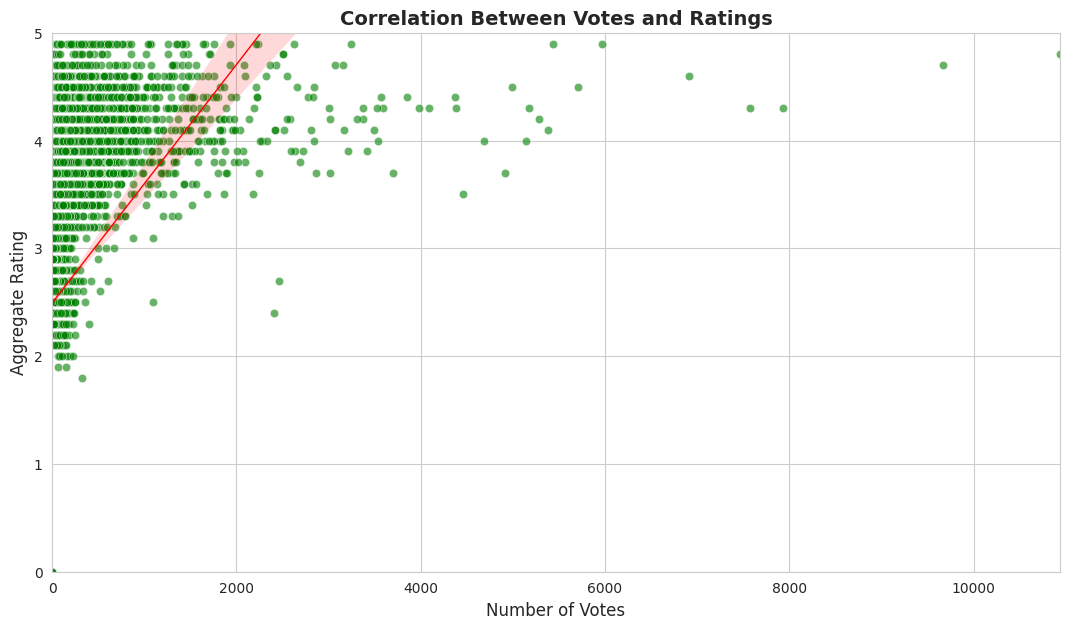

In [109]:
plt.figure(figsize=(13, 7))

# Scatter plot (Votes on X-axis, Rating on Y-axis)
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'], alpha=0.6, color='green')

# Thin trend line (with swapped axes)
sns.regplot(x=df['Votes'], y=df['Aggregate rating'], scatter=False, color='red', line_kws={'linewidth': 1})

# Adjust axis limits
plt.xlim(df['Votes'].min(), df['Votes'].max())  # Votes on X-axis
plt.ylim(0, 5)  # Ratings on Y-axis

plt.xlabel("Number of Votes", fontsize=12)  # Now Votes is X-axis
plt.ylabel("Aggregate Rating", fontsize=12)  # Now Ratings is Y-axis
plt.title("Correlation Between Votes and Ratings", fontsize=14, fontweight='bold')

plt.show()

In [101]:
# Calculate correlation
correlation = df['Votes'].corr(df['Aggregate rating'])  # Pearson correlation by default
print(f"Correlation between Votes and Aggregate Rating: {correlation:.4f}")

Correlation between Votes and Aggregate Rating: 0.3137


# **Task 3: Price Range vs. Online Delivery andTable Booking**

## Q3. Analyze if there is a relationship between the price range and the availability of online delivery and table booking. Determine if higher-priced restaurants aremore likely to offer these services.

In [102]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Reviews', 'Votes'],
      dtype='object')

In [103]:
df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [104]:
df['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

   Price range  Has Online delivery  Has Table booking
0            1            15.774077           0.022502
1            2            41.310633           7.677482
2            3            29.190341          45.738636
3            4             9.044369          46.757679


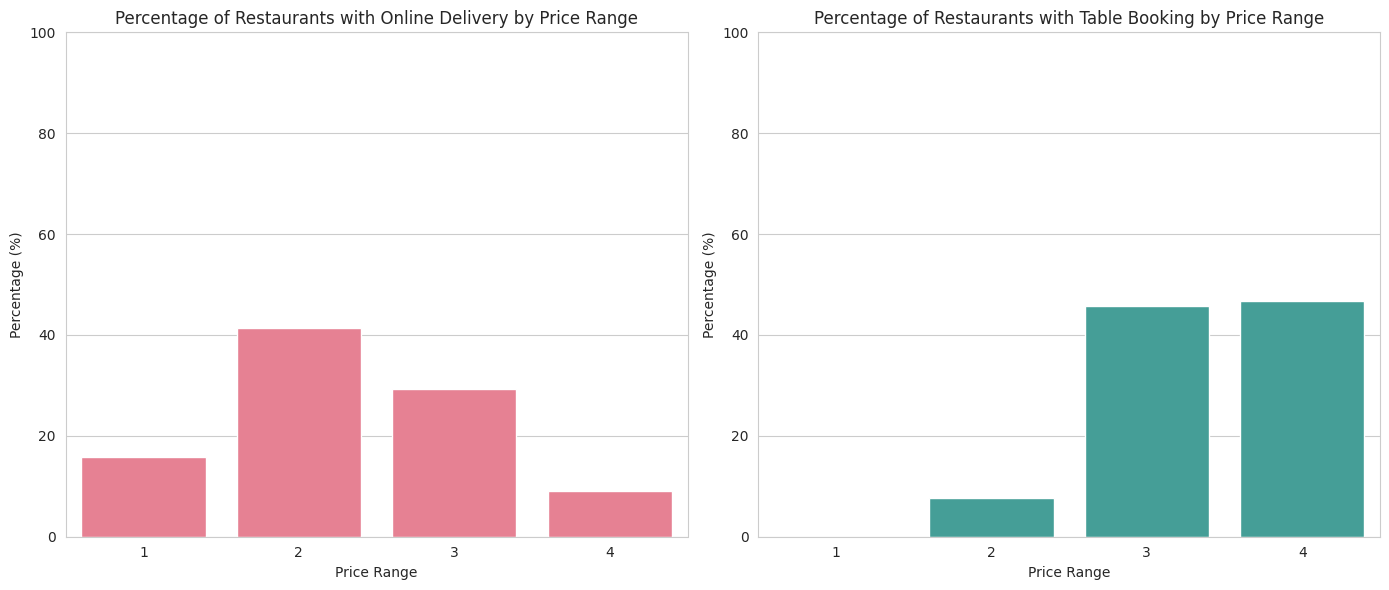

In [105]:
# Set whitegrid style
sns.set_style('whitegrid')

# Ensure proper data formatting
df['Has Online delivery'] = df['Has Online delivery'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
df['Has Table booking'] = df['Has Table booking'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

# Group by Price range
price_group = df.groupby('Price range').agg({
    'Has Online delivery': 'mean',
    'Has Table booking': 'mean'
}).reset_index()

# Convert the mean to percentage
price_group['Has Online delivery'] *= 100
price_group['Has Table booking'] *= 100

# Display results
print(price_group)

# Define unique colors
colors = sns.color_palette("husl", 2)  # Unique hues

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Online Delivery Plot
sns.barplot(x='Price range', y='Has Online delivery', data=price_group, ax=axes[0], color=colors[0])
axes[0].set_title('Percentage of Restaurants with Online Delivery by Price Range')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_ylim(0, 100)

# Table Booking Plot
sns.barplot(x='Price range', y='Has Table booking', data=price_group, ax=axes[1], color=colors[1])
axes[1].set_title('Percentage of Restaurants with Table Booking by Price Range')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()


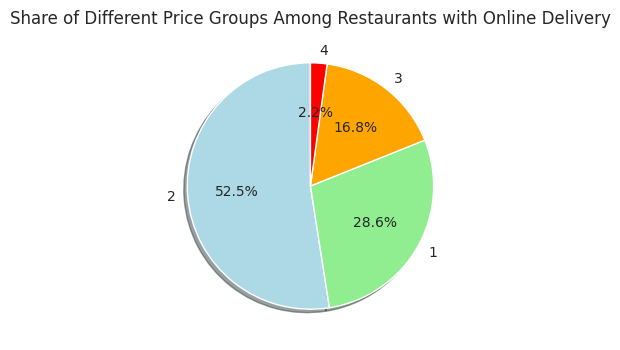

In [106]:
import matplotlib.pyplot as plt

# Filter only restaurants that have online delivery
online_delivery_df = df[df['Has Online delivery'] == 1]

# Count the number of restaurants in each price range
price_group_counts = online_delivery_df['Price range'].value_counts()

# Convert counts to percentages
price_group_percentage = (price_group_counts / price_group_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(price_group_percentage, labels=price_group_percentage.index, autopct='%1.1f%%',
        startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'red'], shadow=True)

# Add title
plt.title('Share of Different Price Groups Among Restaurants with Online Delivery')

# Display the chart
plt.show()


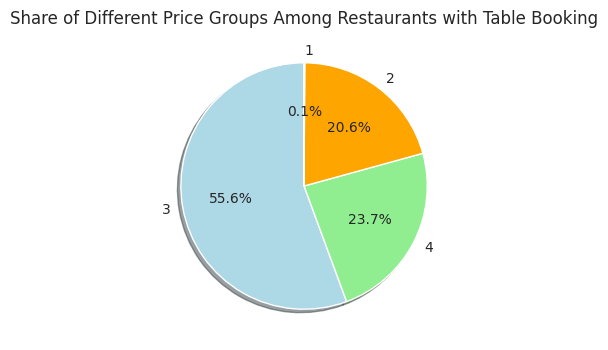

In [107]:
import matplotlib.pyplot as plt

# Filter only restaurants that have table booking
table_booking_df = df[df['Has Table booking'] == 1]

# Count the number of restaurants in each price range
price_group_counts_table = table_booking_df['Price range'].value_counts()

# Convert counts to percentages
price_group_percentage_table = (price_group_counts_table / price_group_counts_table.sum()) * 100

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(price_group_percentage_table, labels=price_group_percentage_table.index, autopct='%1.1f%%',
        startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'red'], shadow=True)

# Add title
plt.title('Share of Different Price Groups Among Restaurants with Table Booking')

# Display the chart
plt.show()
